# 設定

In [ ]:
!pip install japanize-matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
import copy
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from matplotlib.collections import LineCollection

# 図2.1

In [12]:
gfr = pd.read_csv("/content/gfr.txt",names=['x'])

In [13]:
gfr

,x
0,108
1,91
2,62
3,59
4,84
...,...
206,28
207,33
208,35
209,48


Text(0, 0.5, '度数')

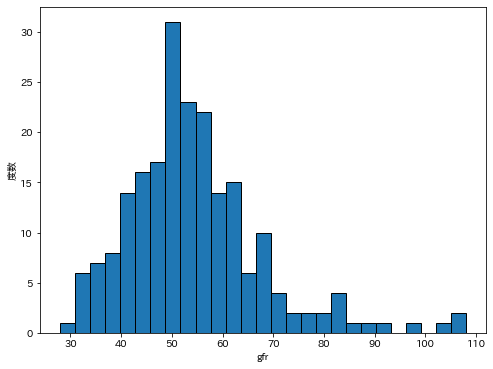

In [25]:
plt.figure(figsize=(8,6))
plt.hist(gfr['x'],edgecolor="black",bins=27)
plt.xlabel('gfr')
plt.ylabel('度数')

In [26]:
gfr['x'].mean()

54.2654028436019

In [28]:
np.sqrt(gfr['x'].var()/len(gfr['x']))

0.9445843621716754

# 図2.2

$n=10,f_0 \sim N(0,1) , f_1 \sim N(0.5,1)$のとき

$\log L(x)=\log \frac{f_1(x)}{f_0(x)}= \sum_{i=1}^{10}0.5x_i-10 \times 0.25/2 =5 \bar{x}-1.25 $

よって
$t_c(x)=\begin{cases}
1,5\bar{x}-1.25\ge c\\
0, 5\bar{x}-1.25 < c
\end{cases}$

$\alpha_c=Pr_{f_0}\{\bar{x} \ge 0.2c+0.25\}＝1-\Phi(\sqrt{10}(0.2c + 0.25)) $,


$\beta_c=Pr_{f_1}\{\bar{x} < 0.2c+0.25\} = \Phi(\sqrt{10}(0.2c - 0.25))$となる。



In [39]:
c_list = [i/10 for i in range(-4,9,2)]
alpha_c = []
beta_c = []
for c in c_list:
  alpha = 1-stats.norm.cdf(x=np.sqrt(10)*(0.2*c + 0.25),loc=0,scale=1)
  beta = stats.norm.cdf(x=np.sqrt(10)*(0.2*c - 0.25),loc=0,scale=1)
  alpha_c.append(alpha)
  beta_c.append(beta)

Text(0, 0.5, 'β')

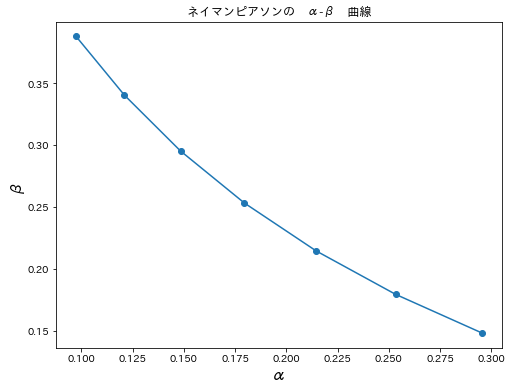

In [52]:
plt.figure(figsize=(8,6))
plt.plot(alpha_c,beta_c,marker='o')
plt.title('ネイマンピアソンの　α-β　曲線')
plt.xlabel('α',fontsize=16)
plt.ylabel('β',fontsize=16)